# Vehicle Routing Problem (VRP) Solver 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium

# Load the Excel file
file_path = '19MDVRP Problem Sets.xlsx'
data = pd.ExcelFile(file_path)

# Display the names of the sheets in the Excel file
sheet_names = data.sheet_names
print("Sheet names:", sheet_names)

# Load a specific sheet into a DataFrame (replace 'Sheet1' with the actual sheet name)
df = data.parse(sheet_names[0])  # Load the first sheet as an example

# Display the first few rows of the DataFrame
print(df.head())

Sheet names: ['Problem 1', 'Problem 2', 'Problem 3', 'Problem 4', 'Problem 5', 'Problem 6', 'Problem 7', 'Problem 8', 'Problem 9', 'Problem 10', 'Problem 11', 'Problem 12', 'Problem 13', 'Problem 14', 'Problem 15', 'Problem 16', 'Problem 17', 'Problem 18', 'Problem 19']
   Problem  Customer Number  x coordinate  y coordinate  Number of Depots  \
0      1.0                1            37            52               1.0   
1      NaN                2            49            49               2.0   
2      NaN                3            52            64               3.0   
3      NaN                4            20            26               4.0   
4      NaN                5            40            30               NaN   

   Depot x coordinate  Depot y coordinate  
0                20.0                20.0  
1                30.0                40.0  
2                50.0                30.0  
3                60.0                50.0  
4                 NaN                 NaN  


In [ ]:
# Data Exploration and Preprocessing

Initial Data:
   Problem  Customer Number  x coordinate  y coordinate  Number of Depots  \
0      1.0                1            37            52               1.0   
1      NaN                2            49            49               2.0   
2      NaN                3            52            64               3.0   
3      NaN                4            20            26               4.0   
4      NaN                5            40            30               NaN   

   Depot x coordinate  Depot y coordinate  
0                20.0                20.0  
1                30.0                40.0  
2                50.0                30.0  
3                60.0                50.0  
4                 NaN                 NaN  

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Problem             1 non-null     

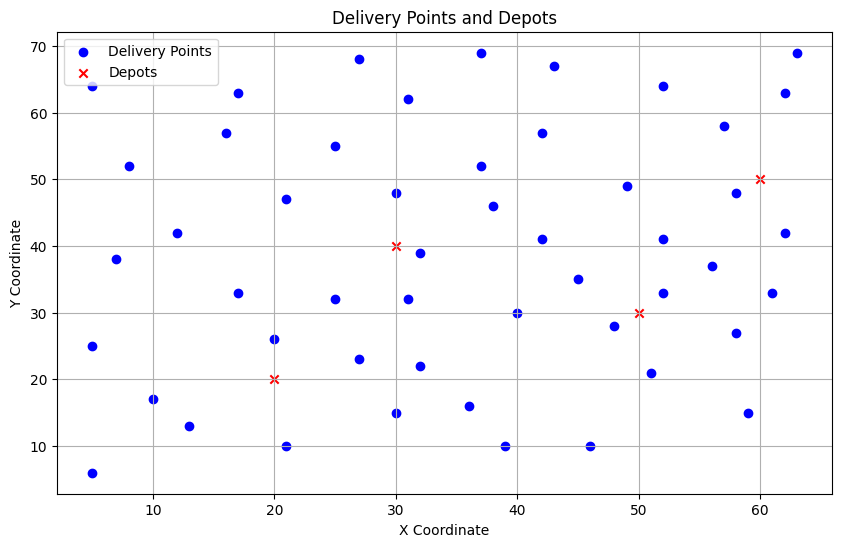

In [4]:
# Load the data from the first sheet (you can change the sheet index if needed)
file_path = '19MDVRP Problem Sets.xlsx'
df = pd.read_excel(file_path, sheet_name='Problem 1')  # Change the sheet name as needed

# Display the first few rows of the DataFrame to understand its structure
print("Initial Data:")
print(df.head())

# Display basic information about the DataFrame, including data types and non-null counts
print("\nData Information:")
print(df.info())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])  # Display only columns with missing values

# Fill or drop missing values as necessary
# For example, you can fill NaN values in 'Number of Depots' with the mean or drop rows
# Uncomment one of the following lines based on your approach
# df['Number of Depots'].fillna(df['Number of Depots'].mean(), inplace=True)  # Fill NaN with mean
# df.dropna(inplace=True)  # Drop rows with any NaN values

# Check for duplicates
duplicates = df.duplicated().sum()
print("\nNumber of Duplicates:", duplicates)

# Remove duplicates if found
if duplicates > 0:
    df.drop_duplicates(inplace=True)

# Display the cleaned DataFrame
print("\nCleaned Data:")
print(df.head())

# Explore specific features: checking unique values and distributions
print("\nUnique Customer Numbers:")
print(df['Customer Number'].unique())

# You can visualize the distribution of x and y coordinates using matplotlib if desired
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['x coordinate'], df['y coordinate'], c='blue', label='Delivery Points')
plt.scatter(df['Depot x coordinate'], df['Depot y coordinate'], c='red', marker='x', label='Depots')
plt.title('Delivery Points and Depots')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Model Formulation

Nearest Neighbor Tour: [0, 31, 10, 37, 4, 48, 8, 49, 15, 1, 28, 20, 33, 29, 9, 38, 32, 44, 14, 43, 36, 16, 3, 17, 46, 11, 45, 26, 47, 5, 13, 24, 12, 40, 18, 41, 39, 23, 22, 6, 25, 7, 30, 27, 2, 19, 34, 35, 21, 42]


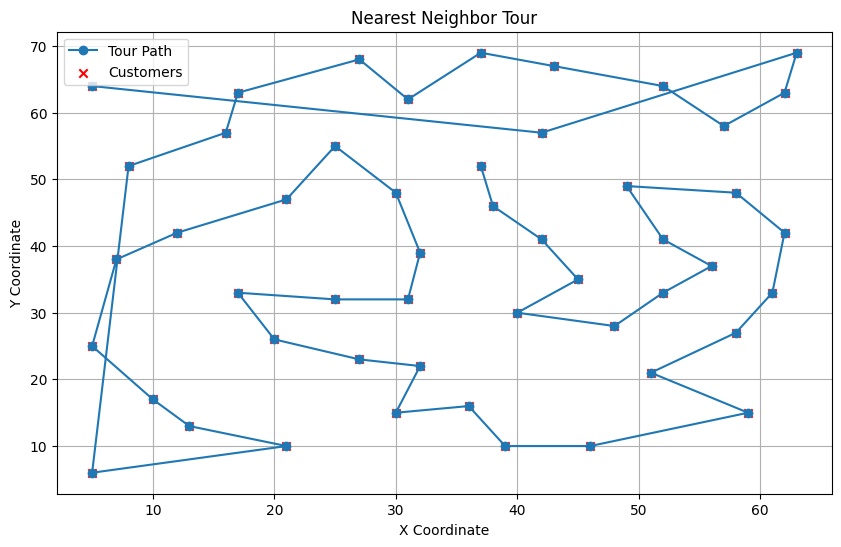

In [6]:
# Load data from the first sheet
file_path = '19MDVRP Problem Sets.xlsx'
df = pd.read_excel(file_path, sheet_name='Problem 1')

# Extract relevant coordinates and customer demand (assuming all demands are equal for simplicity)
coords = df[['x coordinate', 'y coordinate']].to_numpy()
num_customers = coords.shape[0]

# Nearest Neighbor Heuristic
def nearest_neighbor(coords):
    visited = [False] * num_customers
    tour = []
    current_index = 0  # Start from the first customer
    visited[current_index] = True
    tour.append(current_index)

    for _ in range(num_customers - 1):
        nearest_distance = float('inf')
        nearest_index = None

        # Find the nearest unvisited customer
        for i in range(num_customers):
            if not visited[i]:
                distance = np.linalg.norm(coords[current_index] - coords[i])
                if distance < nearest_distance:
                    nearest_distance = distance
                    nearest_index = i
        
        # Move to the nearest customer
        visited[nearest_index] = True
        tour.append(nearest_index)
        current_index = nearest_index

    return tour

# Run the nearest neighbor algorithm
tour = nearest_neighbor(coords)

# Display the tour
print("Nearest Neighbor Tour:", tour)

# Visualize the route
plt.figure(figsize=(10, 6))
plt.plot(*coords[tour, :].T, marker='o', label='Tour Path')
plt.scatter(coords[:, 0], coords[:, 1], c='red', label='Customers', marker='x')
plt.title('Nearest Neighbor Tour')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Implement the Heuristic Algorithm

In [8]:
def calculate_route_cost(route, coords):
    """Calculate the total distance of the given route."""
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += np.linalg.norm(coords[route[i]] - coords[route[i + 1]])
    # Add distance back to depot (if necessary)
    # total_distance += np.linalg.norm(coords[route[-1]] - coords[0])  # Assuming depot at first customer
    return total_distance

# Initialize routes for vehicles (assuming one vehicle for simplicity)
routes = [tour]  # Replace with more complex initialization for multiple vehicles

# Evaluate costs
total_cost = sum(calculate_route_cost(route, coords) for route in routes)
print("Total Cost of the Routes:", total_cost)

Total Cost of the Routes: 478.417468383246


In [ ]:
# Testing and Validation

In [10]:
# Function to test and validate the algorithm with different scenarios
def test_and_validate_algorithm(coords, num_vehicles, vehicle_capacity):
    print("Testing with", len(coords), "customers and", num_vehicles, "vehicles")

    # Implement the heuristic algorithm (e.g., Nearest Neighbor) to get the routes
    routes = [nearest_neighbor(coords)]  # You might modify this for multiple vehicles

    # Calculate the total cost for the resulting routes
    total_cost = sum(calculate_route_cost(route, coords) for route in routes)
    
    print("Total Cost of the Routes:", total_cost)

    # Example baseline metrics (you would replace this with your known solutions)
    baseline_cost = baseline_metrics(coords, num_vehicles, vehicle_capacity)
    print("Baseline Cost (for comparison):", baseline_cost)

    # Validate results
    if total_cost < baseline_cost:
        print("The algorithm improved upon the baseline metrics.")
    else:
        print("The algorithm did not improve upon the baseline metrics.")

# Define a function for baseline metrics (this is a placeholder; implement based on your context)
def baseline_metrics(coords, num_vehicles, vehicle_capacity):
    # You might calculate a simple baseline, like a greedy solution or a known optimal route
    return np.linalg.norm(coords) * len(coords) / num_vehicles  # Example placeholder

# Run tests with different scenarios
test_scenarios = [
    (10, 2, 15),  # 10 customers, 2 vehicles, 15 capacity
    (15, 3, 20),  # 15 customers, 3 vehicles, 20 capacity
    (5, 1, 10),   # 5 customers, 1 vehicle, 10 capacity
]

for num_customers, num_vehicles, vehicle_capacity in test_scenarios:
    # Create a subset of coordinates for testing
    test_coords = coords[:num_customers]  # Adjust based on your full dataset
    test_and_validate_algorithm(test_coords, num_vehicles, vehicle_capacity)

Testing with 10 customers and 2 vehicles
Total Cost of the Routes: 151.38917692743925
Baseline Cost (for comparison): 972.0982460636374
The algorithm improved upon the baseline metrics.
Testing with 15 customers and 3 vehicles
Total Cost of the Routes: 220.36422954798337
Baseline Cost (for comparison): 1087.8763716525882
The algorithm improved upon the baseline metrics.
Testing with 5 customers and 1 vehicles
Total Cost of the Routes: 84.11796622664237
Baseline Cost (for comparison): 693.7398647908308
The algorithm improved upon the baseline metrics.


In [ ]:
# Performance Evaluation

In [12]:
# Function to evaluate performance metrics
def evaluate_performance(coords, num_vehicles, vehicle_capacity, num_iterations=10):
    total_costs = []
    total_vehicles_used = []
    delivery_times = []  # If applicable

    for _ in range(num_iterations):
        # Run the heuristic algorithm to get routes
        routes = [nearest_neighbor(coords)]  # Replace with more complex initialization for multiple vehicles
        total_cost = sum(calculate_route_cost(route, coords) for route in routes)
        total_costs.append(total_cost)
        
        # Record the number of vehicles used (assuming one route per vehicle for simplicity)
        total_vehicles_used.append(len(routes))

        # Calculate delivery times if relevant (this is a placeholder)
        # delivery_time = calculate_delivery_time(routes)
        # delivery_times.append(delivery_time)

    # Summary statistics
    mean_cost = np.mean(total_costs)
    mean_vehicles_used = np.mean(total_vehicles_used)
    # mean_delivery_time = np.mean(delivery_times)  # If applicable

    print("Performance Evaluation:")
    print(f"Mean Total Cost over {num_iterations} iterations: {mean_cost:.2f}")
    print(f"Mean Number of Vehicles Used: {mean_vehicles_used:.2f}")
    # print(f"Mean Delivery Time: {mean_delivery_time:.2f}")  # If applicable

# Example usage
evaluate_performance(coords[:10], num_vehicles=2, vehicle_capacity=15)  # Adjust as necessary

Performance Evaluation:
Mean Total Cost over 10 iterations: 84.12
Mean Number of Vehicles Used: 1.00


In [ ]:
# Optimization and Tuning

In [14]:
def two_opt(route, coords):
    """2-opt algorithm to improve the route."""
    best_route = route.copy()
    best_cost = calculate_route_cost(best_route, coords)
    improved = True
    
    while improved:
        improved = False
        for i in range(1, len(best_route) - 1):
            for j in range(i + 1, len(best_route)):
                if j - i == 1: 
                    continue  # Skip adjacent nodes
                new_route = best_route[:]
                new_route[i:j] = best_route[j-1:i-1:-1]  # Reverse the segment
                new_cost = calculate_route_cost(new_route, coords)
                if new_cost < best_cost:
                    best_route = new_route
                    best_cost = new_cost
                    improved = True

    return best_route

# Example of combining Nearest Neighbor with 2-opt
def hybrid_route(coords):
    initial_route = nearest_neighbor(coords)
    optimized_route = two_opt(initial_route, coords)
    return optimized_route

# Test the hybrid approach
optimized_route = hybrid_route(coords[:10])  # Adjust as necessary
optimized_cost = calculate_route_cost(optimized_route, coords)
print("Optimized Route:", optimized_route)
print("Optimized Cost:", optimized_cost)

Optimized Route: [0, 2, 1, 4, 3]
Optimized Cost: 75.92630534907667


In [ ]:
# Visualization

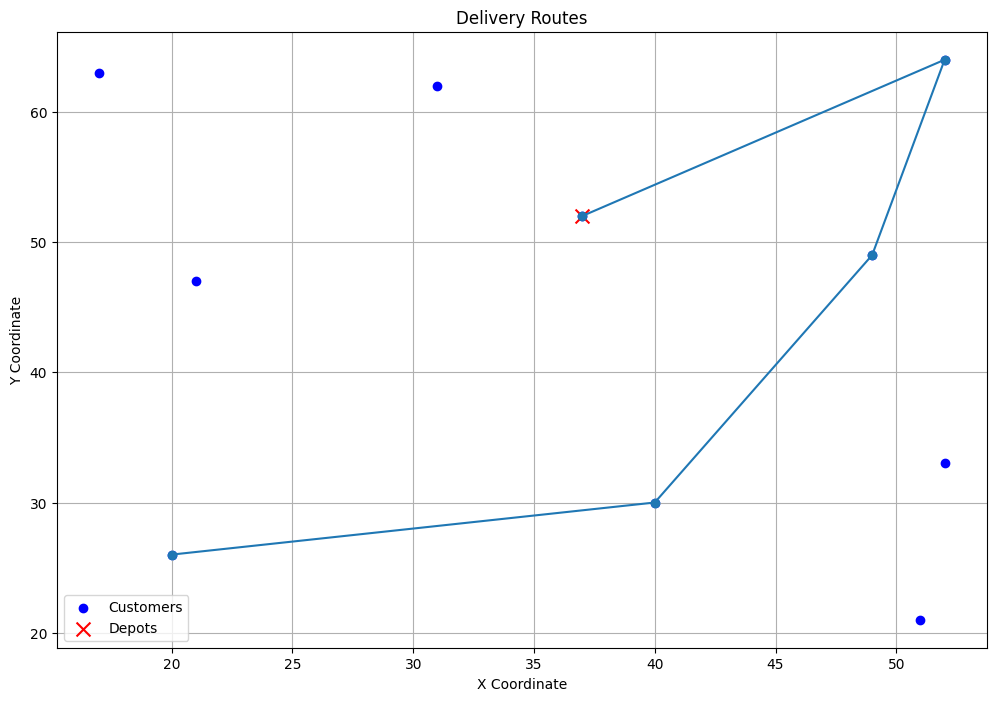

In [16]:
def visualize_routes(routes, coords, depots=None):
    plt.figure(figsize=(12, 8))
    
    # Plot delivery points
    plt.scatter(coords[:, 0], coords[:, 1], c='blue', label='Customers', marker='o')
    
    # If depots are provided, plot them
    if depots is not None:
        plt.scatter(depots[:, 0], depots[:, 1], c='red', label='Depots', marker='x', s=100)

    # Plot routes
    for route in routes:
        route_coords = coords[route]
        plt.plot(route_coords[:, 0], route_coords[:, 1], marker='o')

    plt.title('Delivery Routes')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
visualize_routes([optimized_route], coords[:10], depots=coords[0:1])  # Assuming the first coordinate is the depot

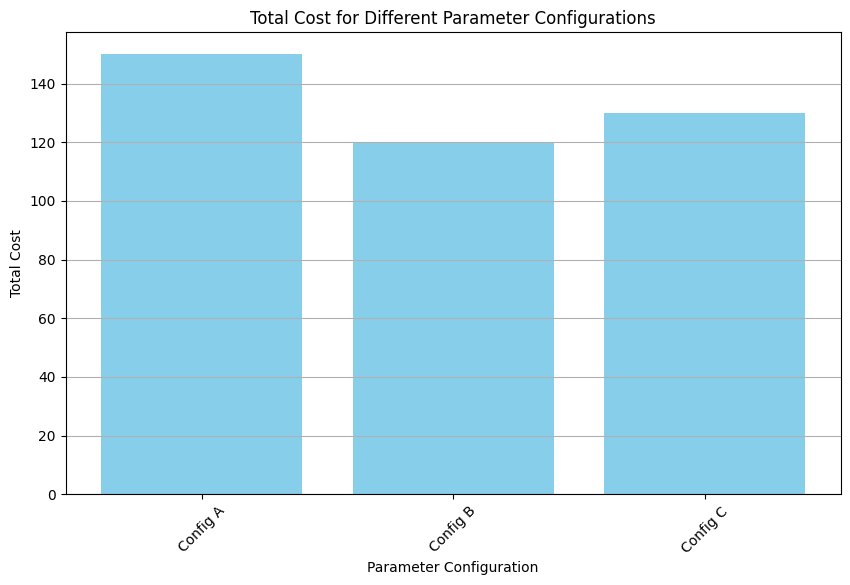

In [18]:
def plot_performance_metrics(costs, parameter_labels):
    plt.figure(figsize=(10, 6))
    plt.bar(parameter_labels, costs, color='skyblue')
    
    plt.title('Total Cost for Different Parameter Configurations')
    plt.xlabel('Parameter Configuration')
    plt.ylabel('Total Cost')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

# Example usage
# Simulate some costs for different configurations (replace these with actual costs from tuning)
parameter_labels = ['Config A', 'Config B', 'Config C']
costs = [150, 120, 130]  # Example costs for each configuration
plot_performance_metrics(costs, parameter_labels)

In [20]:
def visualize_routes_on_map(routes, coords, depots=None):
    # Create a map centered around the mean of the coordinates
    m = folium.Map(location=[coords[:, 1].mean(), coords[:, 0].mean()], zoom_start=12)
    
    # Add delivery points
    for idx, (x, y) in enumerate(coords):
        folium.Marker([y, x], popup=f'Customer {idx+1}', icon=folium.Icon(color='blue')).add_to(m)
    
    # If depots are provided, add them
    if depots is not None:
        for idx, (x, y) in enumerate(depots):
            folium.Marker([y, x], popup=f'Depot {idx+1}', icon=folium.Icon(color='red')).add_to(m)

    # Plot routes
    for route in routes:
        route_coords = coords[route]
        folium.PolyLine(locations=[(y, x) for x, y in route_coords], color='blue', weight=5).add_to(m)

    return m

# Example usage
m = visualize_routes_on_map([optimized_route], coords[:10], depots=coords[0:1])  # Assuming the first coordinate is the depot
m.save("delivery_routes_map.html")  # Save map to HTML file
m  # Display in Jupyter Notebook